In [42]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

# Plot the result of a clustering test
def plot_result(X, y):
    dims = X.shape[1]
    if dims == 2:
        plt.scatter(*X.T, c=y, cmap="rainbow", marker=".", alpha=0.1)
        plt.show()
    else:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(*X.T, c=y, cmap="rainbow", marker=".", alpha=0.1)
        plt.show()
        
        
# Match two clusterings based on their cluster sizes
def match_clusterings(y_true, y_pred):
    # Get the unique assignments & their counts
    values, counts = np.unique(y_true, return_counts=True)
    true_clusters_by_size = values[np.argsort(counts)]
    # Get the predicted unique assignments & counts
    values, counts = np.unique(y_pred, return_counts=True)
    new_clusters_by_size = values[np.argsort(counts)]
    def _map(v):
        return true_clusters_by_size[np.where(new_clusters_by_size == v)[0]]
    return [_map(v) for v in y_pred]

In [47]:
# Load in the projection as found in clustering_2.ipynb
proj = np.load("test-projections/initial-test.npy")
y = np.load("test-projections/y.npy")

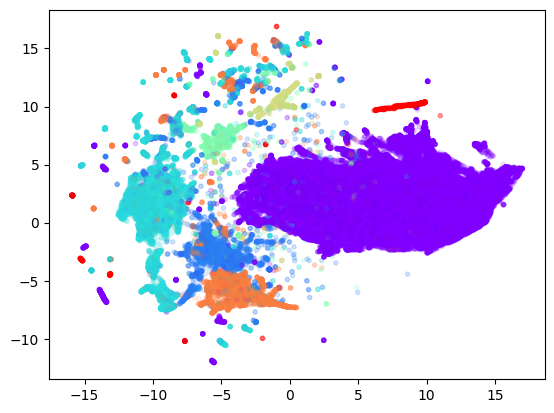

In [48]:
# Plot the projection
plot_result(proj, y)

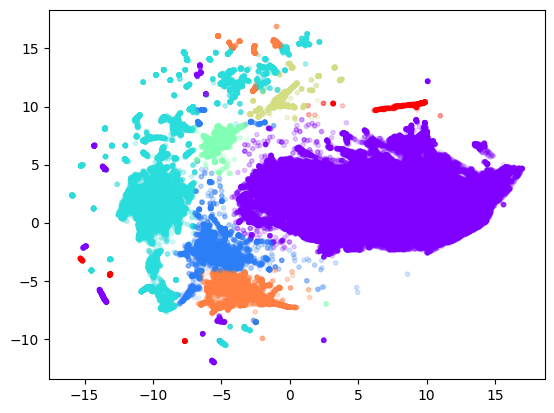

In [51]:
# Try RFC
rfc = RandomForestClassifier(n_jobs=-1, max_depth=6)
rfc.fit(proj, y.ravel())
pred = rfc.predict(proj)
plot_result(proj, match_clusterings(y, pred))

In [52]:
rfc.score(proj, y)
adjusted_rand_score(y.ravel(), rfc.predict(proj))

0.9444209716848245